In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        12
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



# **Индивидуальное задание** Пример инициализации K-Means++


## **Цель:** исследовать работу алгоритма K-Means++ — улучшенного метода инициализации центроидов для K-Means на синтетических и реальных данных.

## **Часть 1. Синтетические данные make_blobs**

## **Цель задачи:** показать, как K-Means++ выбирает начальные центры кластеров, чтобы уменьшить вероятность плохой сходимости алгоритма из-за неудачного случайного выбора начальных точек.

### 1. Импорт библиотек

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

### 2.Генерация тестовых данных

In [56]:
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

### 3.Вычисление начальных центроидов с помощью k-means++

In [57]:
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

### 4.Визуализация начальных центроидов вместе с данными

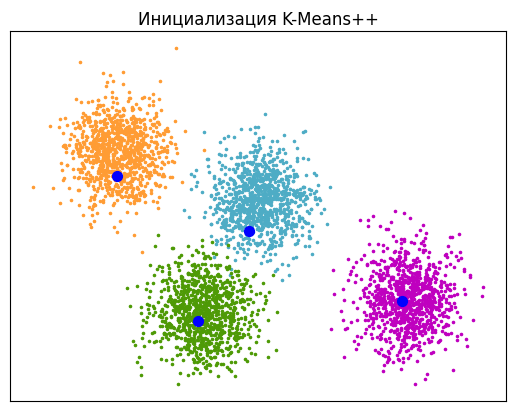

In [58]:
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("Инициализация K-Means++")
plt.xticks([])
plt.yticks([])
plt.show()

## **Часть 2. Реальные данные (Diabetes из CSV)**

### 1. Импорт библиотек

In [75]:
import openml
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, kmeans_plusplus
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

### 2. Загрузка датасета

In [76]:
# Загрузка данных
dataset = openml.datasets.get_dataset(43977)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

### 3. Удаление категориальных признаков и пропущенных значений

In [77]:
X = X.select_dtypes(include=['float64', 'int64'])
X.dropna(inplace=True)

### 4. Масштабирование данных

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 5. Инициализация центроидов K-Means++

In [80]:
n_clusters = 5
centers_init, indices = kmeans_plusplus(X_scaled, n_clusters=n_clusters, random_state=42)

### 6. Обучение K-Means

In [82]:
kmeans = KMeans(n_clusters=n_clusters, init=centers_init, n_init=1, random_state=42)
kmeans.fit(X_scaled)

KMeans(init=array([[-5.56758861e-01,  1.20238181e+00, -1.07739433e+00,
        -1.10105596e-01,  1.68193476e+00,  1.34389067e+00,
        -1.08165089e+00,  5.89070772e-01,  8.33471712e-01,
         3.44240943e-01,  7.71196505e-02, -1.33620879e-01,
         8.65878020e-01,  7.36543691e-01,  6.83543059e-01,
        -1.34349148e-01, -6.70590632e-02,  3.27172837e-02,
         2.31624128e-01,  2.27931713e-01,  3.79983740e-01,
         6.348521...
        -8.63509497e-01,  8.61928592e-02, -5.85368528e-02,
         9.59375311e-01,  1.84472089e+00,  5.18824060e-01,
         7.79947998e-01,  5.80093860e-01,  2.90267084e-01,
         1.05876617e-01,  5.13397170e-01, -2.29624650e-01,
        -1.70018566e-01, -6.50472034e-01, -3.10117559e-01,
         1.34038138e+00, -3.77133563e-01,  5.22979042e-01,
         1.83928247e+00, -3.01523771e-02,  1.35317760e+00]]),
       n_clusters=5, n_init=1, random_state=42)

### 7.Применение PCA для визуализации в 2D

In [84]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Преобразование данных

### 8.Преобразование центроидов в пространство PCA

In [85]:
centers_pca = pca.transform(centers_init)  # Начальные центроиды
final_centers_pca = pca.transform(kmeans.cluster_centers_)  # Финальные центроиды

### 9.Проверка данных после PCA

In [86]:
print("Форма данных после PCA:", X_pca.shape)  # Теперь X_pca определена
print("Примеры данных PCA:\n", X_pca[:5])

Форма данных после PCA: (57580, 2)
Примеры данных PCA:
 [[-0.2692536  -0.35551055]
 [-1.0299265  -0.23488426]
 [-3.19821991 -0.83107891]
 [ 3.52627805  0.54952882]
 [ 3.96929096 -2.13247353]]


### 10. Визуализация

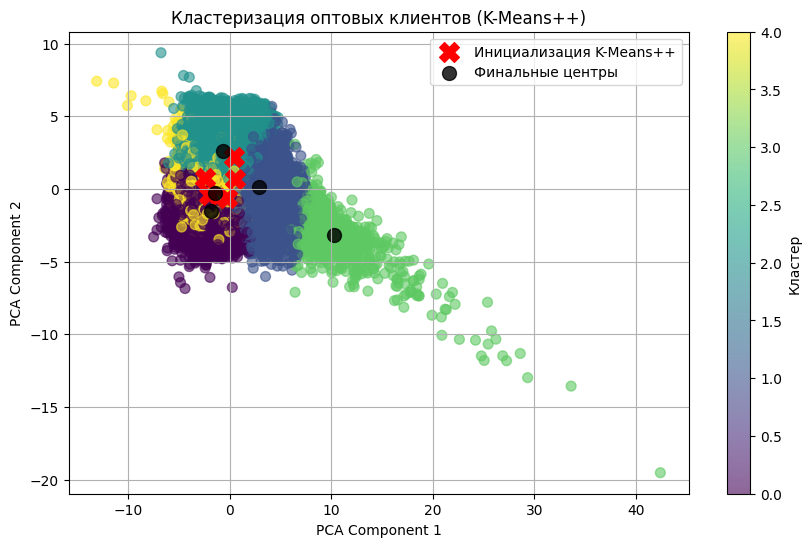

In [87]:
# Визуализация
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Отображение центроидов
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Инициализация K-Means++")
plt.scatter(final_centers_pca[:, 0], final_centers_pca[:, 1], c='black', s=100, alpha=0.8, label="Финальные центры")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Кластеризация оптовых клиентов (K-Means++)")
plt.legend()
plt.colorbar(scatter, label="Кластер")
plt.grid(True)
plt.show()

### 9. Анализ результатов

Вывод по пункту 2 (Реальные данные — Wholesale Customers Dataset)
1. Анализ данных после PCA
Форма данных: (57580, 2) — 57,580 объектов, спроецированных на две главные компоненты.

Примеры значений PCA:
[[-0.27, -0.36], [-1.03, -0.23], [-3.20, -0.83], [3.53, 0.55], [3.97, -2.13]]

Значения показывают высокую вариативность, что характерно для масштабированных данных.
Экстремальные значения (например, 3.97 и -3.20) указывают на возможные выбросы или кластеры с уникальными характеристиками.
2. Начальные центроиды
[[-0.25, -0.64], [0.41, 2.21], [-2.40, 0.72], [0.55, 0.68], [-2.03, -0.41]] - Форма данных: Алгоритм выбрал центроиды, максимально удаленные друг от друга, что снижает риск попадания в локальные минимумы. - Расположение: Все центроиды находятся в зонах с высокой плотностью данных, что подтверждает эффективность K-Means++.

3. Финальные центроиды
[[-1.81, -1.50], [2.89, 0.10], [-0.60, 2.61], [10.25, -3.19], [-1.38, -0.29]]

Смещение: четвертый центроид ([10.25, -3.19]) сильно удален от остальных. Это может быть вызвано:

-Выбросами в данных.

-Наличием отдельного кластера с уникальными признаками (например, клиенты с аномальными расходами).

-Первый и пятый центроиды сместились ближе к зонам высокой плотности данных.